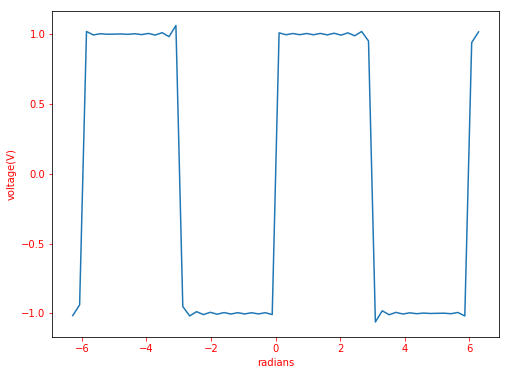

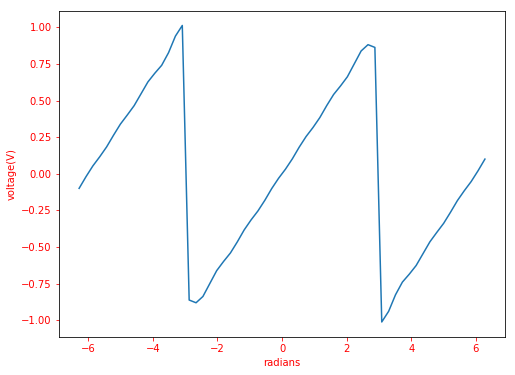

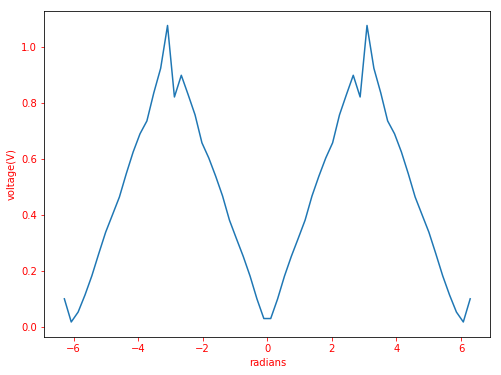

In [98]:
import matplotlib.pyplot as plt
import numpy as np

#Python signal generator. 


class Signal(object):
    f =1
    a=1
    shift=0
    Fs=60
    h=2
    wtype = 0
    def __init__(self,freq,amplitude,shift):
        self.f=freq
        self.a=amplitude
        self.shift= (shift / 180)*np.pi
        
    def fig(self):
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111)
        ax.xaxis.label.set_color('red')
        ax.yaxis.label.set_color('red')
        ax.tick_params(axis='x', colors='red')
        ax.tick_params(axis='y', colors='red')
        plt.xlabel('radians')
        plt.ylabel('voltage(V)')
        
    def sine(self, Fs):
        self.Fs=Fs
        self.wtype = 0
        self.fig()
        x=np.linspace(-2*np.pi,2*np.pi,self.Fs) 
        plt.plot(x,self.fsi(x))
        plt.show()
        
    def fsi(self,x):
        value = 0.0
        x = (x - self.shift)
        value = np.sin(2*np.pi*self.f*x / self.Fs)
        return value
    def fsq(self,x):    
        value = 0.0
        h = self.h
        x = (x - self.shift)
        for h in range(1, h):
            value = value + (np.sin(2 * np.pi * self.f * x * (1/self.Fs)* (2 * h - 1))/(2 * h - 1))
        value *= (self.a*( 4 / np.pi))
        return value
    def fst(self,x):
        value = 0.0
        h= self.h
        x = (x - self.shift)
        for h in range(1, h):
            value = value + ((-1)**(h+1))*(np.sin(2 * np.pi * self.f * x * (1/self.Fs)* (2 * h - 1))/(((2 * h) - 1)*((2 * h) - 1)))
        value *= self.a*( 8 / ((np.pi)**2))
        return value
    def fss(self,x):
        value = 0.0
        h = self.h
        x = (x - self.shift)
        for h in range(1,h):
            value = value + (np.sin(2 * np.pi * x * self.f * h * (1 / self.Fs)) / h)*((-1)**h)
        value *= (-2 / np.pi)
        return value
                                                      
    def square(self, Fs, Harmonics):
        self.Fs = Fs
        self.h = Harmonics
        self.wtype = 1
        value = 1
        x = np.linspace(-2*np.pi,2*np.pi,self.Fs)
        self.fig()
        plt.plot(x, self.fsq(x))   
        plt.show()            
                                                      
    def triangle(self, Fs, Harmonics):
        self.Fs = Fs
        self.h = Harmonics
        self.wtype = 2
        value = 1
        x = np.linspace(-2*np.pi,2*np.pi,self.Fs)
        self.fig()
        plt.plot(x, self.fst(x))
        plt.show()
        
    def sawtooth(self, Fs, Harmonics):
        self.Fs = Fs
        self.h = Harmonics
        self.wtype = 3
        value = 1
        x = np.linspace(-2*np.pi, 2*np.pi, self.Fs)
        self.fig()
        plt.plot(x, self.fss(x))
        plt.show()
        
    def op(self, wtype, x):
        if (wtype == 0):
            return self.fsi(x)
        elif (wtype == 1):
            return self.fsq(x)
        elif (wtype == 2):
            return self.fst(x)
        elif (wtype == 3):
            return self.fss(x)
        
    def multiply(self, sig):
        self.fig()
        x1 = np.linspace(-2*np.pi, 2*np.pi, self.Fs)
        x2 = np.linspace(-2*np.pi, 2*np.pi, sig.Fs)
        plt.plot(x1, self.op(self.wtype, x1) * sig.op(sig.wtype,x2))
    
    def add(self,sig):
        self.fig()
        x= np.linspace(-2*np.pi, 2*np.pi, self.Fs)
        plt.plot(x, self.op(self.wtype,x) + sig.op(sig.wtype,x))
    
    def subtract(self, sig):
        self.fig()
        x = np.linspace(-2*np.pi, 2*np.pi, self.Fs)
        plt.plot(x, self.op(self.wtype,x) - sig.op(sig.wtype,x))
    
    
###################################################################################################################################    
#Create a signal object instance. sig1 = Signal(frequency,amplitude,timeshift)
#sig1.square(sampling frequency, harmonics) creates a square wave with characteristics determined by Signal constructor.
#sig1.sine(sampling frequency)
#sig1.triangle(sampling frequency, harmonics)
#sig1.sawtooth(sampling frequency, harmonics)
#Create a second signal object instance, and set parameters.
#sig1.add(sig2) adds sig2 to sig 1.
#sig1.subtract(sig2) subtracts sig2 from sig1.
#sig1.multiply(sig2) multiples sig2 by sig1.
    
    
sig1=Signal(10,1,0)    
sig1.square(60,50)
sig2=Signal(10,1,0)
sig2.sawtooth(60,50)
sig1.multiply(sig2)

        
       
        
        